In [ ]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import scipy.signal
import pandas as pd
import IPython.display as ipd
import librosa
import matplotlib.colors as mcolors
from scipy.io import wavfile

In [ ]:
data_dir = '../data/'

In [ ]:
data_file_list = glob(data_dir + '*.wav')

In [ ]:
data_file_list[0]

In [ ]:
ipd.Audio(data_file_list[0])

In [ ]:
SAMPLE_RATE = 20000

In [ ]:
raw_neural_data, sr = librosa.load(data_file_list[0], sr = SAMPLE_RATE)

In [ ]:
raw_neural_data_bytes = raw_neural_data.tobytes()

In [ ]:
len(raw_neural_data_bytes)

In [ ]:
stop_time = len(raw_neural_data) / SAMPLE_RATE
time = np.arange(0, stop_time, step=(1/SAMPLE_RATE))

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(time, raw_neural_data)
plt.title('Raw Neural Data Vs. Time [s]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(['Raw Neural Signal'])
plt.show()

In [ ]:
# It appears there is a trend in the data that is non-zero
detrend_y = scipy.signal.detrend(raw_neural_data)


In [ ]:
# Plotting the Detrended Signal
plt.figure(figsize=(12, 4))
plt.plot(time, detrend_y, label='Detrended Signal')
plt.plot(time, raw_neural_data, label='Raw Signal')
plt.title('Detrended Neural Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## Frequency Analysis of Raw Neural Data

In [ ]:
FFT = np.fft.fft(detrend_y)
half_length_of_the_FFT = int(len(FFT)/2)

# Creating frequency bins
N = len(FFT)

freq_bins = np.arange(start=0, stop=(sr/2), step=(sr/N))

In [ ]:
len(freq_bins) == int(len(FFT)/2)

In [ ]:
psd = FFT * np.conj(FFT)/ len(FFT)

In [ ]:
psd = psd[0:len(psd)//2]

In [ ]:
# Plot the Frequency Domain Transform of the Detrended Neural Data
plt.figure(figsize=(36,4))
plt.plot(freq_bins, abs(FFT[0:len(FFT)//2]), 
         label='FFT of the Detrended Neural Signal', linewidth=.1)
plt.title('Magnitude of the FFT of the Detrended Neural Data', fontsize=20)
plt.xlabel('Frequencies [Hz]', fontsize=20)
plt.ylabel('Magnitude', fontsize=20)
plt.legend()
plt.show()

In [ ]:
# Plot of the PSD of the Detrended Neural Data
plt.figure(figsize=(12,4))
plt.plot(freq_bins, psd, 
         label='Power of the Detrended Neural Signal', linewidth=1)
plt.title('Power Spectral Density of the Detrended Neural Data', fontsize=20)
plt.xlabel('Frequencies [Hz]', fontsize=20)
plt.ylabel('Power', fontsize=20)
plt.legend()
plt.show()


In [ ]:
# Sorting the peaks and printing the corresponding indices:
freq_amplitudes = abs(FFT[0:int(len(FFT)/2)])
freq_amplitudes_df = pd.DataFrame(freq_amplitudes, columns = ['Amplitude'])
freq_amplitudes_df_sorted = freq_amplitudes_df.sort_values(by='Amplitude', ascending=False).head(20)

In [ ]:
freq_amplitudes_df_sorted.head()

In [ ]:

def fft_filter_custom(percentage, freq_bins, FFT):
    threshold = percentage * (2 * abs(FFT[0:len(FFT)//2]) / len(freq_bins)).max()
    print(f"threshold: {threshold}")
    filtered_FFT = FFT.copy()
    filtered_FFT_mag = np.abs(filtered_FFT)
    filtered_FFT_mag = 2*filtered_FFT_mag / len(freq_bins)
    filtered_FFT[filtered_FFT_mag <= threshold]=0
    return filtered_FFT

# Plotting the thresholded FFT
# This is incorrect: the signal is mirrored about the vertical axis of the graph
percentage = 0.2

fft_filtered_custom = fft_filter_custom(percentage, freq_bins, FFT)
time_filtered_custom = np.fft.ifft(fft_filtered_custom)

plt.figure(figsize=(24, 4))
plt.plot(time, time_filtered_custom)
plt.show()


In [ ]:
plt.plot(freq_bins, abs(FFT[0:len(FFT)//2]))

iFFT = np.fft.ifft(FFT)
plt.figure(figsize=(12,4))
plt.plot(time, iFFT, label = 'iFFT of detrended_y')
plt.plot(time, detrend_y, linewidth=0.1, label = 'detrended_y')
plt.legend()
plt.show()

In [ ]:
type(freq_bins)

In [ ]:
percentage = .6
plt.figure(figsize=(12, 4))
# plt.plot(time, detrend_y, label='Raw Neural Signal', color=list(mcolors.TABLEAU_COLORS.keys())[1])
plt.plot(time, 
         np.fft.ifft(fft_filter_custom(percentage, freq_bins, FFT)), 
         color=list(mcolors.TABLEAU_COLORS.keys())[0],
         label='Thresholded Detrended Signal')  
plt.title('Filtered Signal Thresholded at %0.0f%% of the Maximum Frequency'% (percentage*100))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.show()

##### [Detecting noise by examining the correllation between the residual and the original waveform.](https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71)

## Reading the audio bytes using scipy.io.wavfile

In [ ]:
sample_rate, raw_audio_bytes_scipy = scipy.io.wavfile.read(data_file_list[0])

In [ ]:
print(len(raw_neural_data))
print(len(raw_audio_bytes_scipy))

In [ ]:
time_end = len(raw_audio_bytes_scipy) / sample_rate 
time_end

In [ ]:
time_raw_audio_bytes_scipy = np.arange(start=0, stop=time_end, step=(1/sample_rate))

In [ ]:
plt.plot(time_raw_audio_bytes_scipy, raw_audio_bytes_scipy)
len(time_raw_audio_bytes_scipy)


In [ ]:
SAMPLE_RATE = 20000
raw_neural_data, sr = librosa.load(data_file_list[0], sr = SAMPLE_RATE)

# It appears there is a trend in the data that is non-zero
detrend_y = scipy.signal.detrend(raw_neural_data)

# FFT = np.fft.fft(detrend_y)
FFT = np.fft.fft(detrend_y)
half_length_of_the_FFT = int(len(FFT)/2)

# Creating frequency bins
N = len(FFT)

freq_bins = np.arange(start=0, stop=(sr/2), step=(sr/N))

def fft_filter_custom(percentage, freq_bins, FFT):
    threshold = percentage * (2 * abs(FFT[0:len(FFT)//2]) / len(freq_bins)).max()
    print(f"threshold: {threshold}")
    filtered_FFT = FFT.copy()
    filtered_FFT_mag = np.abs(filtered_FFT)
    filtered_FFT_mag = 2*filtered_FFT_mag / len(freq_bins)
    filtered_FFT[filtered_FFT_mag <= threshold]=0
    return filtered_FFT

# Plotting the thresholded FFT
percentage = 0.2

fft_filtered_custom = fft_filter_custom(percentage, freq_bins, FFT)
time_filtered_custom = np.fft.ifft(fft_filtered_custom)

plt.figure(figsize=(24, 4))
plt.plot(time, time_filtered_custom)
plt.show()


In [ ]:
time_filtered_custom_bytes = time_filtered_custom.tobytes()

## [Identifying the optimal threshold at which to filter the signal](https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71)

In [ ]:
type(freq_bins)

In [ ]:
SAMPLE_RATE = 20000
raw_neural_data, sr = librosa.load(data_file_list[0], sr = SAMPLE_RATE)

# It appears there is a trend in the data that is non-zero
detrend_y = scipy.signal.detrend(raw_neural_data)

# FFT = np.fft.fft(detrend_y)
FFT = np.fft.fft(detrend_y)
half_length_of_the_FFT = int(len(FFT)/2)

# Creating frequency bins
N = len(FFT)

freq_bins = np.arange(start=0, stop=(sr/2), step=(sr/N))



In [87]:


def fft_filter_custom(percentage, freq_bins, FFT):
    threshold = percentage * (2 * abs(FFT[0:len(FFT)//2]) / len(freq_bins)
                              ).max()
    # print(f"threshold: {threshold}")
    filtered_FFT = FFT.copy()
    filtered_FFT_mag = np.abs(filtered_FFT)
    filtered_FFT_mag = 2*filtered_FFT_mag / len(freq_bins)
    filtered_FFT[filtered_FFT_mag <= threshold]=0
    return filtered_FFT



In [ ]:
import scipy.stats as stats

In [ ]:
percentage_list = np.linspace(0, 1, num=1000)

Text(0.5, 0, 'Percentage of Filter')

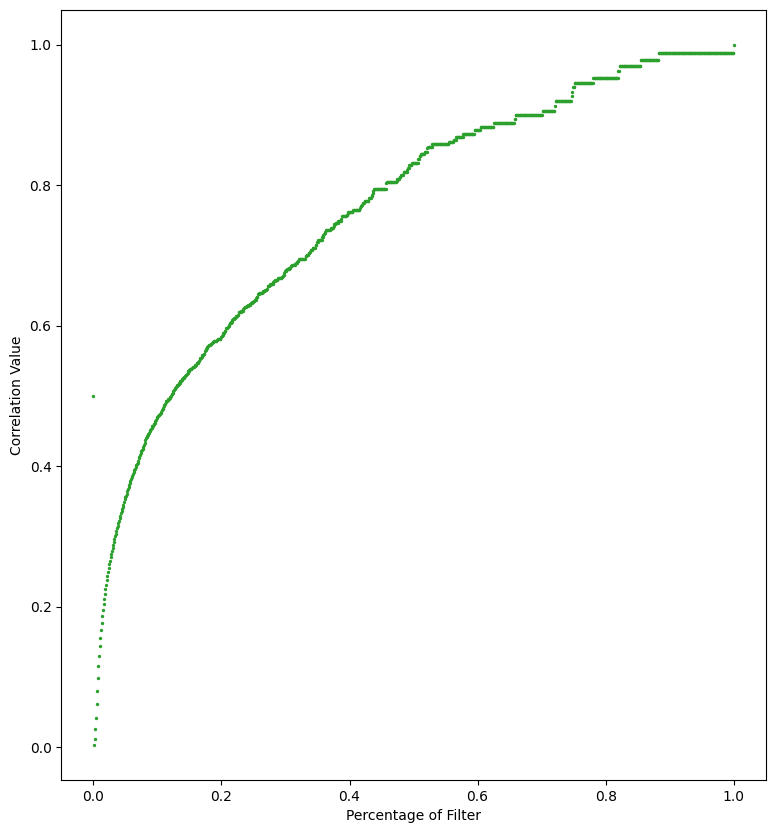

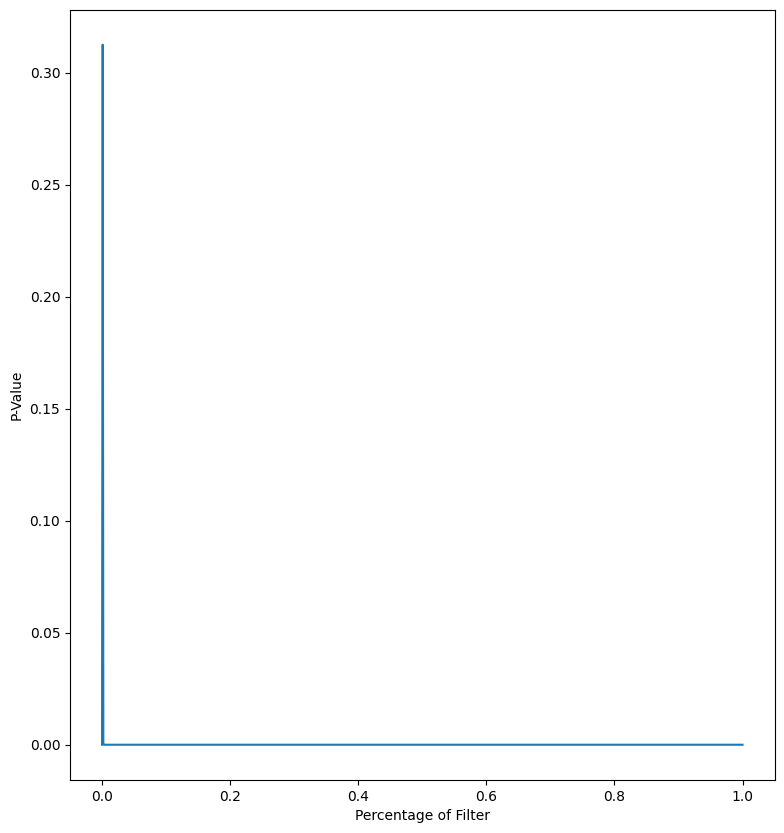

In [93]:
p_values = []
correlation_values = []
for percentage in percentage_list:
    fft_filtered_custom = fft_filter_custom(percentage, freq_bins, FFT)    
    filtered_signal = np.fft.ifft(fft_filtered_custom)
    residuals = stats.spearmanr(detrend_y, detrend_y - filtered_signal)
    p_values.append(residuals.pvalue)
    correlation_values.append(residuals.correlation)

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.scatter(percentage_list, correlation_values, s=2, color='tab:green')
plt.ylabel('Correlation Value')
plt.xlabel('Percentage of Filter')

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
plt.plot(percentage_list, p_values)
plt.ylabel('P-Value')
plt.xlabel('Percentage of Filter')


In [95]:
pd.DataFrame(p_values).describe()


,0
count,1000.000000
mean,0.000313
std,0.009882
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.312486
